

## Chicago Crime

**Project by**
Dan Cleveland
Phillip Cunningham
Chris Shaw


##### Notes: Please download the full Chicago dataset csv from the following link.  
The data set is 1.32 gb, so downloading directly from an ipynb takes a considerable amount of time.  We used geojson data of Chicago which we had to clean to work with the folium data package.  Please install this non standard package and obtain the boundary areas here (in geojson format):

CSV Data
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

Export as 'geojson'
https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6


In [1]:
import numpy as np
import pandas as pd
import datetime
import urllib
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt        # graphics module  
import folium
import json
%matplotlib inline

from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict

In [2]:
df = pd.read_csv('Crimes_-_2001_to_present.csv', sep=',')

In [3]:
df = df[['Year','Primary Type','Location Description','Community Area','Latitude','Longitude','Arrest','Description']] 

In [4]:
df.head()

Year       Primary Type            Location Description  Community Area  \
0  2004           BURGLARY                       RESIDENCE              66   
1  2005      OTHER OFFENSE                       RESIDENCE              28   
2  2005            BATTERY                   CHA APARTMENT              28   
3  2005  CRIMINAL TRESPASS  PARKING LOT/GARAGE(NON.RESID.)               6   
4  2004    CRIMINAL DAMAGE                       CTA TRAIN              49   

    Latitude  Longitude Arrest                     Description  
0  41.772597 -87.698101  False                  FORCIBLE ENTRY  
1  41.877634 -87.679514  False         HARASSMENT BY TELEPHONE  
2  41.865685 -87.659087  False  AGGRAVATED:KNIFE/CUTTING INSTR  
3  41.935829 -87.649120   True                         TO LAND  
4  41.721627 -87.624485  False                     TO PROPERTY

In [5]:
len(df.columns)

8

In [6]:
df.shape

(6040759, 8)

In [7]:
len(df['Primary Type'].unique())

35

In [8]:
len(df)

6040759

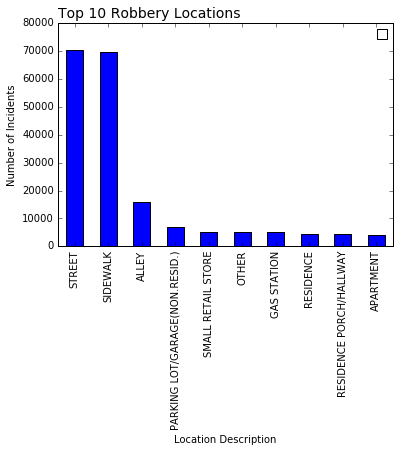

In [9]:
dfrobbery = df[['Primary Type','Location Description']] ##create file with just 2 columns
dfrobbery = dfrobbery[dfrobbery['Primary Type'].str.contains('ROBBERY')]   ## extract only rows that were ROBBERY
dfrobbery = dfrobbery.groupby(['Location Description'])  ##group it by the location where the robbery took place
dfrobbery = dfrobbery.count().sort_values(by='Primary Type', ascending=[0]) ## count the number of robberies in each location
dfrobbery = dfrobbery.head(10)  ## extract the top 10 categories

dfrobbery.plot(kind='bar')
plt.title('Top 10 Robbery Locations', fontsize=14, loc='left')  ## Add  title
plt.legend('') ### Get rid of legend
plt.ylabel('Number of Incidents')   ###Add y label

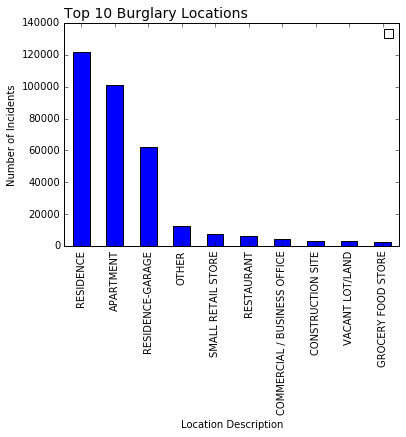

In [10]:
dfburglary = df[['Primary Type','Location Description']] ##create file with just 2 columns
dfburglary = dfburglary[dfburglary['Primary Type'].str.contains('BURGLARY')]   ## extract only rows that were BURGLARY
dfburglary = dfburglary.groupby(['Location Description'])  ##group it by the location where the burglary took place
dfburglary = dfburglary.count().sort_values(by='Primary Type', ascending=[0]) ## count the number of burglaries in each location
dfburglary = dfburglary.head(10)  ## extract the top 10 categories

dfburglary.plot(kind='bar')
plt.title('Top 10 Burglary Locations', fontsize=14, loc='left')  ## Add  title
plt.legend('') ### Get rid of legend
plt.ylabel('Number of Incidents')   ###Add y label

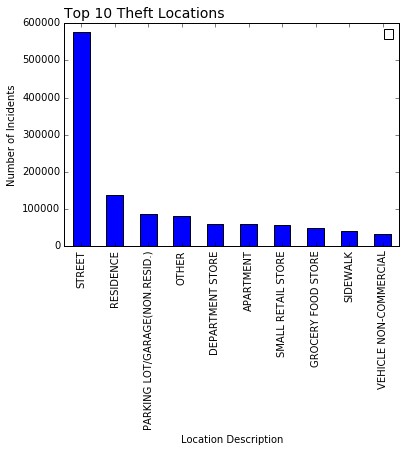

In [11]:
dftheft = df[['Primary Type','Location Description']] ##create file with just 2 columns
dftheft = dftheft[dftheft['Primary Type'].str.contains('THEFT')]   ## extract only rows that were THEFT
dftheft = dftheft.groupby(['Location Description'])  ##group it by the location where the theft took place
dftheft = dftheft.count().sort_values(by='Primary Type', ascending=[0]) ## count the number of thefts in each location
dftheft = dftheft.head(10)  ## extract the top 10 categories

dftheft.plot(kind='bar')
plt.title('Top 10 Theft Locations', fontsize=14, loc='left')  ## Add  title
plt.legend('') ### Get rid of legend
plt.ylabel('Number of Incidents')   ###Add y label

#### Robbery, Burglary, and Theft Data

As a way to start the analysis of the crime data we wanted to observe where the most "stealing crimes" took place. It is useful to note the technical differences between several types of similar crimes, which many people consider to be synonymous, but which law enforcement catagorizes differently: robbery, burglary, and theft. **Robbery** is the act of forcibly stealing from a person. For example a mugging is a robbery as is someone snatching your cell phone out of your hands while you are texting. **Burglary** is the act of breaking and entering then stealing something or committing another crime. **Theft** is simply stealing. This could be taking a watch out of a gym locker room or stealing jewelry from a store.

It is not suprising to see that street and sidewalk were the most common areas for robberies, and that residences were the largest victims of burglaries. However, the fact that the street was the most common area for thefts was surprising to us. This left us wondering about the exact nature of these crimes. What types of things could be stolen on the street that don't involve mugging or some kind of forcible theft from a person (which would classify the crime as a robbery)?

Our best guess is that many of these street "thefts" were actually more like robberies when they were committed, but were reclassified.  Generally, theft is a misdemeanor offense (less than $500) and robbery is always a felony. The reason behind this reclassification is unclear, but it could have something to do with additional paperwork for police, mitigating circumstances, plea deals, or if we are being cynical, an attempt to make crime trends seem less serious than they actually are in the city of Chicago.


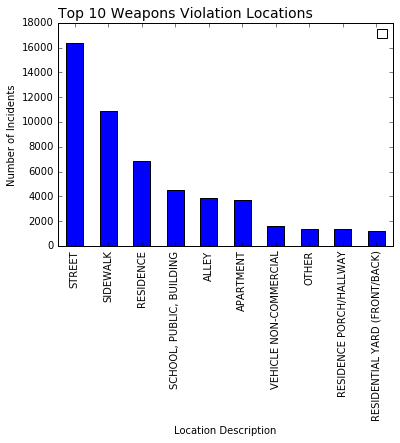

In [12]:
dfweapon = df[['Primary Type','Location Description']] ##create file with just 2 columns
dfweapon = dfweapon[dfweapon['Primary Type'].str.contains('WEAPONS VIOLATION')]   ## extract only rows that were VIOLATION
dfweapon = dfweapon.groupby(['Location Description'])  ##group it by the location where the robbery took place
dfweapon = dfweapon.count().sort_values(by='Primary Type', ascending=[0]) ## count the number of robberies in each location
dfweapon = dfweapon.head(10)  ## extract the top 10 categories

dfweapon.plot(kind='bar')

plt.title('Top 10 Weapons Violation Locations', fontsize=14, loc='left')  ## Add  title
plt.legend('') ### Get rid of legend
plt.ylabel('Number of Incidents')   ###Add y label

#### Weapons violations 

We also wanted to investigate where the most weapons violations took place. We performed a similar code base as the robbery data 
set to extract the top 10 locations where weapons violations are most common. We created a sorted bar graph to display the data. 

After a review of the chart it is not surprising that street and sidewalk were the most common places for weapon violations. The
police would arrest individuals on the street and sidewalk and frisk for guns. The interesting factor was that school/ public 
buidling was number four on the list. That is large number of weapons violations for public buildings. Therefore, we wanted to
dig into that data set a bit more to see what was causing that large number.


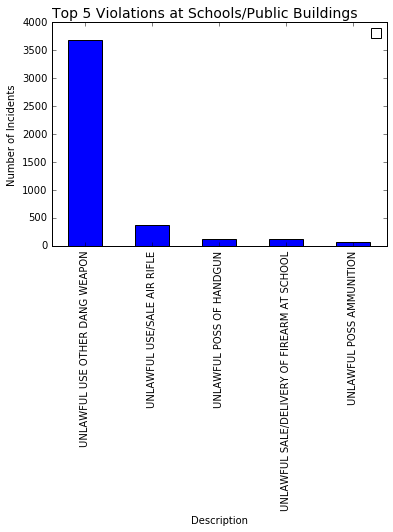

In [13]:
dfschool = df[['Primary Type','Location Description','Description']] 
##create file with just 3 columns
dfschool = dfschool[dfschool['Primary Type'].str.contains('WEAPONS VIOLATION')]   
## extract only rows that were Weapons VIOLATIONs
dfschool = dfschool.loc[dfschool['Location Description'] == 'SCHOOL, PUBLIC, BUILDING']    
##extract rows where the violations took place in a school for public space
dfschool = dfschool.drop(['Primary Type'],1)
## drop the primary type because it is redundant
dfschool = dfschool.groupby(['Description'])
## group by the type of violation
dfschool = dfschool.count().sort_values(by='Location Description', ascending=[0])
## Count the number of violations and sort by top 10
dfschool = dfschool.head(5)
## extract top 5 violations

dfschool.plot(kind='bar')   ### create bar chart
plt.title('Top 5 Violations at Schools/Public Buildings', fontsize=14, loc='left')  ## Add  title
plt.legend('') ### Get rid of legend
plt.ylabel('Number of Incidents')   ###Add y label


#### Violations in Schools and Public Buildings & verbiage of weapons possession laws

In order to dive slightly deeper into the violations that occurred in public areas and schools we extracted all the violations 
that occurred at Schools, Public, Buidlings and sorted by the description. This gave us the types of violations that occurred at
these locations. The largest of these violations was the use of a dangerous weapon, while the sales of firearms at school was
low at only 111 instances.

Chicago has some of the strictest gun control laws in the nation that provide misdemeanor and felony charges for most people possessing firearms. One question that remains puzzling is what constitutes the unlawful use of "other" dangerous weapons. According to the Illinois Criminal Code, this has a very broad definition, covering anything from brass knuckles to tasers to pistols. How does this differ from unlawful possession of a handgun, which intuitively would seem to be a much more common offense than the above graph indicates? There are several reasons. First, unlawful use of other dangerous weapon is a Class 1 misdemeanor whereas unlawful possession of a handgun is a felony. Also, unlawful possession of a handgun is limited to people who are underage, have mental disabilities, or have a criminal record. Unlawful use of other dangerous weapons is broader and does not require any special circumstances in order to take effect.


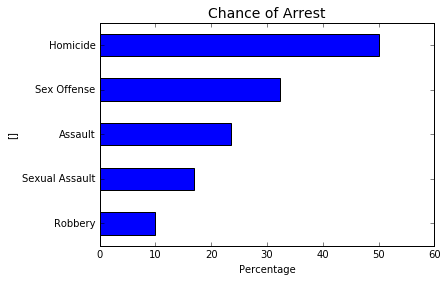

In [14]:
### This code is used to extract the percentage of arrest made for different types of crimes
dfH = df[['Primary Type','Arrest']]  ## extract 2 columns from larger data set
dfH = dfH[dfH['Primary Type'].str.contains('HOMICIDE')]  ## use only crimes that are 'Homicide'
del dfH['Primary Type']   ## del primary type because this column is not longer needed and inteferes with the calc
PerH = dfH[dfH['Arrest']==True].sum() / dfH['Arrest'].count()  # compare the number of arrests to the total number of homicides
PerH = float(PerH)*100  ## create a new variable call 'PerH' that is the percentage of sovled homicides

###recreate the same procedures as completed under 'Homicide' for Assault
dfA = df[['Primary Type','Arrest']]
dfA = dfA[dfA['Primary Type'].str.contains('ASSAULT')]
del dfA['Primary Type']
PerA = dfA[dfA['Arrest']==True].sum() / dfA['Arrest'].count()
PerA = float(PerA)*100

###recreate the same procedures as completed under 'Homicide' for Sex Offense
dfSO = df[['Primary Type','Arrest']]
dfSO = dfSO[dfSO['Primary Type'].str.contains('SEX OFFENSE')]
del dfSO['Primary Type']
PerSO = dfSO[dfSO['Arrest']==True].sum() / dfSO['Arrest'].count()
PerSO = float(PerSO)*100

###recreate the same procedures as completed under 'Homicide' for Criminal Sexual Assault
dfCSA = df[['Primary Type','Arrest']]
dfCSA = dfCSA[dfCSA['Primary Type'].str.contains('CRIM SEXUAL ASSAULT')]
del dfCSA['Primary Type']
PerCSA = dfCSA[dfCSA['Arrest']==True].sum() / dfCSA['Arrest'].count()
PerCSA = float(PerCSA)*100

###recreate the same procedures as completed under 'Homicide' for Robbery
dfRob = df[['Primary Type','Arrest']]
dfRob = dfRob[dfRob['Primary Type'].str.contains('ROBBERY')]
del dfRob['Primary Type']
PerRob = dfRob[dfRob['Arrest']==True].sum() / dfRob['Arrest'].count()
PerRob = float(PerRob)*100

###create a new data frame with the proper names and the variables that were created for each group
dfnew = pd.DataFrame({'Type': ['Homicide','Assault','Sex Offense','Sexual Assault','Robbery'],
                      'Percentage': [PerH,PerA,PerSO,PerCSA,PerRob]})
## Create new data set with the variables we just created
dfnew = dfnew.sort_values(['Percentage'])
## sort by the value of the percentage
dfnew = dfnew.set_index(['Type'])
## set the index to type for chart purposes

fig, ax = plt.subplots()
dfnew.plot(ax=ax, kind='barh') ## create a horizontal bar chart
ax.set_title('Chance of Arrest', fontsize=14, loc='Center') ## set title to middle and change name
ax.set_xlabel('Percentage')  ## add x label
ax.legend_.remove()  ## get rid of the legend
ax.set_ylabel([])  ## Remove y label



### Arrest data

We chose 5 types of crimes that represent the FBI violent crimes to analyze for arrest purposes. There are numerous other types
of crimes that exist in the database but these would be the highest profile and have the highest chance of investigation. 

 In order to extract the data we pulled the type of crime and if an arrest had happened related to that crime into the dataset.
 We then created a variable for each crime that measured the percentage of arrests that were made for each type of crime. 

 After creating this chart it was interesting to us that the chance of arrest for each type of crime was much lower than
 we anticipated. If you are murdered in Chicago there is only a 50% chance that an arrest will be made related to that murder.
 Furthermore, it is interesting that only about 10% of robberies have an arrest. So if you are robbed in Chicago there is a
 pretty low chance you will ever find out who did it. 

# Heatmaps of total Crime

### High crime neighborhoods over time

We were interested to know how crime trends may have shifted in the Chicago area over time. We felt that heat maps would be a useful way to conduct this analysis and decided to compare 2002 data to 2105 data. We found that the overall number of crimes decreased, but that the same neightborhoods that suffered high crime rates in 2002 also suffered high crime rates in 2015. In fact, the geographic trends are almost identical.

###### Folium is a rather new datapackage and still a bit buggy.  
The Chicago geojson data has more attributes than is required for the package so the following loads the geojson, strips unnecessary components and saves down


In [15]:
Chicago_Coords = [41.88, -87.62]

In [16]:
with open('Boundaries - Community Areas (current).geojson') as f:
    comm_area = json.load(f)

In [17]:
geometry, geo_id = [], []
for areas in comm_area['features']:
    geometry.append(areas['geometry']['coordinates'][0])
    geo_id.append(areas['properties']['area_num_1'])
    
CA = pd.DataFrame(np.c_[geo_id, geometry], columns=['Comm_area', 'geometry'])

In [18]:
def df_to_geojson(df):
    geojson = {'type':'FeatureCollection', 'features':[]}
    for row in df.iterrows():
        feature = {'type':'Feature',
                   'Comm_area_id':row[1]['Comm_area'],
                   'geometry':{'type':'Polygon',
                               'coordinates':row[1]['geometry']}}
        geojson['features'].append(feature)
    return geojson

In [19]:
new_geojson = df_to_geojson(CA)
with open('NewChicagoboundaries.txt', 'w') as outfile:
    json.dump(new_geojson, outfile)

###### The community area must eventually be converted to a string and the '.0' stripped

In [20]:
def trim_fraction(text):
    if '.0' in text:
        return text[:text.rfind('.0')]
    return text

###### We wanted to look at two different points in time to determine if any noticable improvements could be summarmized when it comes to crime in particular community areas

In [21]:
crime02 = df[df.Year ==2002]
crime02 = crime02.groupby(['Community Area'], as_index=False)['Year'].count()
crime02['Community Area'] = crime02['Community Area'].astype(str)
crime02['Community Area'] = crime02['Community Area'].apply(trim_fraction)
crime02 = crime02[crime02['Community Area']!='0']

In [22]:
crime15 = df[df.Year ==2015]
crime15 = crime15.groupby(['Community Area'], as_index=False)['Year'].count()
crime15['Community Area'] = crime15['Community Area'].astype(str)
crime15['Community Area'] = crime15['Community Area'].apply(trim_fraction)
crime15 = crime15[crime15['Community Area']!='0']

### Crime by community area in 2002

In [23]:
districtmap02 = folium.Map(location=Chicago_Coords, zoom_start=10)
districtmap02.choropleth(geo_path = 'NewChicagoboundaries.txt',data = crime02,
              columns = ['Community Area', 'Year'],
              key_on = 'feature.Comm_area_id',fill_color='YlGn',
              fill_opacity=0.7, line_opacity=0.2,
                legend_name='Crime Rate')
districtmap02

C:\Users\phill\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


### Crime by Community Area in 2015


In [24]:
districtmap15 = folium.Map(location=Chicago_Coords, zoom_start=10)
districtmap15.choropleth(geo_path = 'NewChicagoboundaries.txt',data = crime15,
              columns = ['Community Area', 'Year'],
              key_on = 'feature.Comm_area_id',fill_color='YlGn',
              fill_opacity=0.7, line_opacity=0.2,
                legend_name='Crime Rate')
districtmap15

C:\Users\phill\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


###### Notes:

The highest crime neighborhood is Austin (dark green), which also has the highest murder rate in the city - by a lot

In [25]:
df_count = df[['Year','Community Area']]
df_count_pivot = df_count.pivot_table(index='Community Area',columns='Year', aggfunc=len)

In [26]:
toptenoverall = df_count_pivot.iloc[:,len(df_count_pivot.columns) -1].sort_values(ascending=False).head(10).index.values
highest = df_count_pivot[df_count_pivot.index.isin(toptenoverall)]
highest

Year            2001   2002   2003   2004   2005   2006   2007   2008   2009  \
Community Area                                                                 
8                 93  12546  15468  15758  14641  14222  13881  13513  12274   
23               228  11233  15494  14539  14798  13710  13055  13262  12768   
24               122  12340  15388  14154  12866  13012  12341  12724  11795   
25               280  21112  30833  29483  28372  28891  28531  27259  26032   
28               100  10852  15803  14768  13213  12144  11610  11588  10361   
29               147   8718  12348  13369  12735  12077  11347  11407  10424   
32                86   7292   9568   9306   8954   8728   8714   8731   8067   
43               115  10835  14629  14374  14423  14833  14271  14247  13064   
67                82  10185  13917  14119  13671  13708  13559  13536  11524   
71                96   8977  12300  13147  12818  12150  13324  12886  11763   

Year             2010   2011   2012   2013   2014   2015  2016  
Community Area                                                  
8               11591  11218  11278  10100   8971   8990  2599  
23              11824  11146  11200  10251   9174   8078  2014  
24              11358  10132   9677   8202   7325   7012  1897  
25              24278  22699  21320  20207  18690  17155  4121  
28               9804   9662   9408   8499   7877   7872  2298  
29              10846   9998  10381   9779   8637   8163  2192  
32               7838   7602   7765   7777   7273   7550  2232  
43              12319  12080  11599  10560   9251   8984  2018  
67              11220  10817   9978   9009   7590   7342  1694  
71              10659  10252   9409   8566   7961   7790  1962

In [27]:
lowtenoverall = df_count_pivot.iloc[:,len(df_count_pivot.columns) -1].sort_values(ascending=False).tail(10).index.values
lowest = df_count_pivot[df_count_pivot.index.isin(lowtenoverall)]
lowest

Year            2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
Community Area                                                               
0                NaN     6     8    16     3    12     6    11     5     3   
9                  4   323   427   400   461   437   419   473   386   305   
12                 6   618   841   775   872   786   745   798   751   695   
18                11   924  1287  1036  1006  1004  1063  1019  1098   899   
36                 8   868   893   904   880   801   944   960   855   859   
37                 8  1295  1937  1521  1392  1521  1418  1404  1159  1215   
47                 6   470   681   735   715   667   734   743   608   459   
55                10   722  1066  1003   928   965   859   971   819   765   
64                25  1452  1948  1912  1822  1823  1931  1906  1660  1398   
74                10   831  1129  1097  1046   952   963   944   895   916   

Year            2011  2012  2013  2014  2015  2016  
Community Area                                      
0                  5     6     3     2     2   NaN  
9                368   324   297   242   254    96  
12               602   600   442   460   445   138  
18               851   781   633   522   581   160  
36               793   771   713   637   625   164  
37              1187  1222  1076   931   838   211  
47               455   535   470   402   384    93  
55               822   739   714   624   509   147  
64              1337  1277  1114   997   930   209  
74               727   707   626   669   610   162

###### Crimes have certainly declined BUT the proportion is roughly the same meaning that each neighborhood hasn't seen impressive strides